In [3]:
!nvidia-smi

Sat Dec 21 11:28:08 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.17                 Driver Version: 561.17         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8              3W /   40W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import torch
print(torch.cuda.is_available())

True


In [5]:
from diffusers import StableDiffusion3Pipeline, StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

In [6]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

In [7]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1)
pipe = pipe.to('cuda')

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
prompt = "A Boy With MacBook Pro"

In [9]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

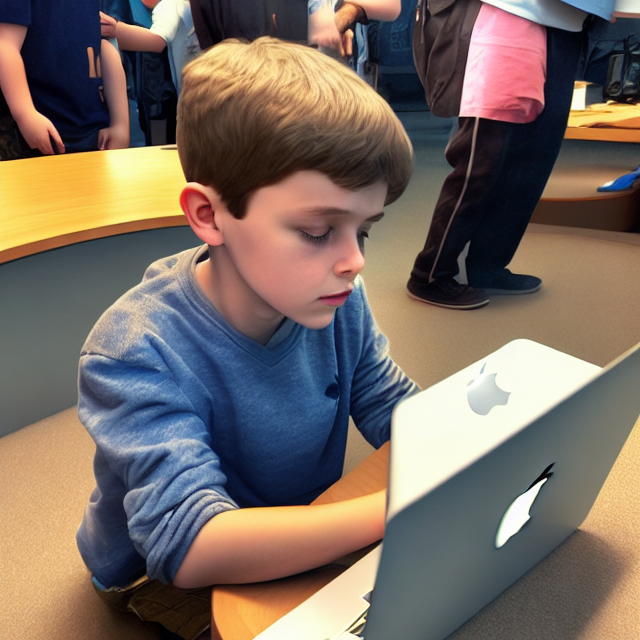

In [10]:
image

]PROMPT:  A Boy With MacBook Pro


(-0.5, 639.5, 639.5, -0.5)

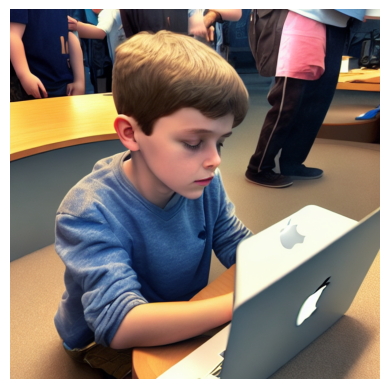

In [11]:
print("]PROMPT: ", prompt)
plt.imshow(image)
plt.axis('off')

### Working with StableDiffusion Parameters
- Negative prompting
- num_inference_steps
- height
- wight
- num_images_per_prompt

In [12]:
def generate_image(pipe,prompt,params):
    img = pipe(prompt, **params).images
    
    num_images = len(img)
    if num_images > 1:
        fig, axs = plt.subplots(nrows=1, ncols=num_images)
        for i in range(num_images):
            axs[i].imshow(img[i])
            axs[i].axis('off')
            
    else:
        fig = plt.figure()
        plt.imshow(img[0])
        plt.axis('off')
    plt.tight_layout()

In [13]:
prompt = "A boy, who studying in chandigarh university and now that boy feel some strees and his focus is not on their career only all time watching webseries and movies on netflix and amazon prime"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

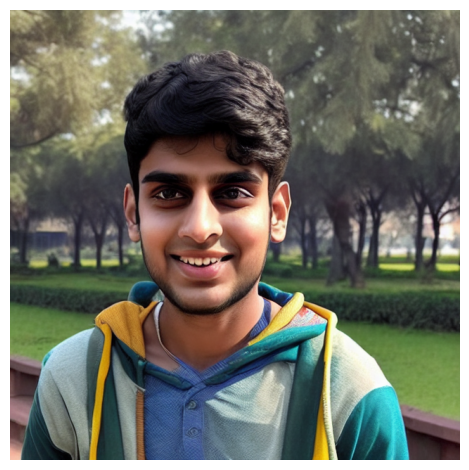

In [14]:
generate_image(pipe,prompt,params)

In [15]:
prompt = "I Love Generative AI and I want to become a Gen ai engineer"

params = {'num_inference_steps': 100}    

  0%|          | 0/100 [00:00<?, ?it/s]

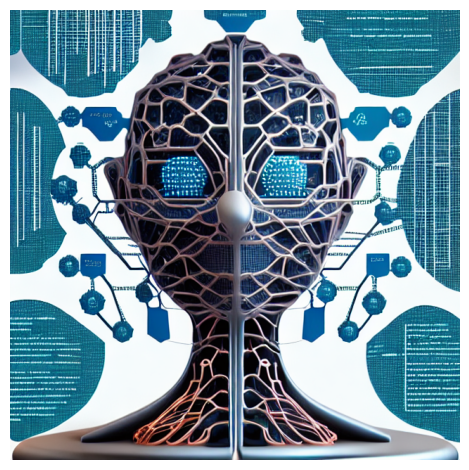

In [16]:
generate_image(pipe,prompt,params)

In [17]:
#params = {'num_inference_steps': 10, 'width': 512, 'height': int(1.5*640)}
#generate_image(pipe,prompt,params)

In [18]:
# num_image_per_prompt 
#params = {'num_inference_steps': 10, 'width': 512, 'height': int(1.5*640), 'num_image_per_prompt': 3}
#generate_image(pipe,prompt,params)

In [19]:
# Remove Negative Prompt
#params = {'num_inference_steps': 10, 'width': 512, 'height': int(1.5*640), 'num_image_per_prompt': 3,'negative_prompt':'ugly,distored'} 
#generate_image(pipe,prompt,params)